In [1]:
from src.rel_prop.min_max_rel_model import MinMaxModel, Nested_Regressor
from src.models.Binary_Mnist_Model import Montavon_Classifier
import numpy as np
from src.rel_prop.minmax_utils import get_higher_relevances
import matplotlib.pyplot as plt
import time

In [2]:
mc = Montavon_Classifier(class_nb=8, load_model=False)
mc.set_data(test_size=0.2)
mc.set_model()
mc.model.summary()
time0=time.time()
mc.fit_model(epochs=300, batch_size=32)
time1 = time.time()-time0
print("Duration to fit Montavon Classifier: {}".format(time1))

vance-Propagation/src/models/../../models/minmax/montavon_classifier_8/model.h5
546/546 - 2s - loss: 0.5599 - acc: 0.8645 - val_loss: 0.5702 - val_acc: 0.8494
Epoch 21/100

Epoch 00021: saving model to /home/robin/Documents/Programmierprojekte/Relevance-Propagation/src/models/../../models/minmax/montavon_classifier_8/model.h5
546/546 - 1s - loss: 0.5572 - acc: 0.8688 - val_loss: 0.5682 - val_acc: 0.8567
Epoch 22/100

Epoch 00022: saving model to /home/robin/Documents/Programmierprojekte/Relevance-Propagation/src/models/../../models/minmax/montavon_classifier_8/model.h5
546/546 - 1s - loss: 0.5548 - acc: 0.8756 - val_loss: 0.5671 - val_acc: 0.8533
Epoch 23/100

Epoch 00023: saving model to /home/robin/Documents/Programmierprojekte/Relevance-Propagation/src/models/../../models/minmax/montavon_classifier_8/model.h5
546/546 - 1s - loss: 0.5525 - acc: 0.8774 - val_loss: 0.5651 - val_acc: 0.8700
Epoch 24/100

Epoch 00024: saving model to /home/robin/Documents/Programmierprojekte/Relevance-Pr

In [37]:
mc.evaluate(batch_size=32)

171/171 [==============================] - 0s 1ms/step - loss: 3.8591 - acc: 0.7498


0.7498168349266052

In [38]:
mc.non_trivial_accuracy()

0.34773060029282576

In [3]:
# use to recalc relevances for the training of the min max model. Therefore set recalc_rel to True


In [3]:
minmax = MinMaxModel(classifier=mc, use_higher_rel=True)



Started to collect relevances to train min-max-model!
Info: You decided to use higher relevances for training.
Load relevances to train min-max-model from local directory!
Created MinMaxModel


In [4]:
nr_train_images = minmax.nr_train_images
true_relevances = minmax.true_relevances
higher_relevances = minmax.higher_relevances

time2 = time.time()
minmax.train_min_max(pretrained=False)
time3 = time.time()-time2
print("Duration to train Min-Max-Model: {}".format(3))

Start Training of Min-Max-Model
Created nested regressor for neuron with index 0
Created nested regressor for neuron with index 1
Created nested regressor for neuron with index 2
Created nested regressor for neuron with index 3
Created nested regressor for neuron with index 4
Created nested regressor for neuron with index 5
Created nested regressor for neuron with index 6
Created nested regressor for neuron with index 7
Created nested regressor for neuron with index 8
Created nested regressor for neuron with index 9
Created nested regressor for neuron with index 10
Created nested regressor for neuron with index 11
Created nested regressor for neuron with index 12
Created nested regressor for neuron with index 13
Created nested regressor for neuron with index 14
Created nested regressor for neuron with index 15
Created nested regressor for neuron with index 16
Created nested regressor for neuron with index 17
Created nested regressor for neuron with index 18
Created nested regressor for

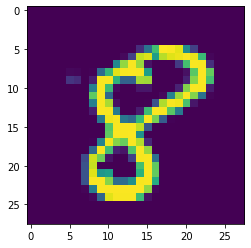

Start Relevance Propagation
Starte Relevance Propagation für Nested Regressor mit Neuron Index 0
Starte Relevance Propagation für Nested Regressor mit Neuron Index 1
Starte Relevance Propagation für Nested Regressor mit Neuron Index 2
Starte Relevance Propagation für Nested Regressor mit Neuron Index 3
Starte Relevance Propagation für Nested Regressor mit Neuron Index 4
Starte Relevance Propagation für Nested Regressor mit Neuron Index 5
Starte Relevance Propagation für Nested Regressor mit Neuron Index 6
Starte Relevance Propagation für Nested Regressor mit Neuron Index 7
Starte Relevance Propagation für Nested Regressor mit Neuron Index 8
Starte Relevance Propagation für Nested Regressor mit Neuron Index 9
Starte Relevance Propagation für Nested Regressor mit Neuron Index 10
Starte Relevance Propagation für Nested Regressor mit Neuron Index 11
Starte Relevance Propagation für Nested Regressor mit Neuron Index 12
Starte Relevance Propagation für Nested Regressor mit Neuron Index 13
St

In [40]:
from src.plotting.plot_funcs import plotly_mnist_image
import random 

while True:
    idx = random.randint(0, minmax.classifier.test_images.shape[0])
    if mc.predict_train_image(idx) == 1 and mc.train_labels[idx] ==1:
        break
plotly_mnist_image(minmax.classifier.test_images[idx])
final_relevance, zplus_relevance = minmax.min_max_rel_prop(idx)

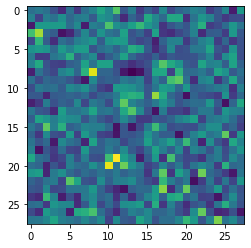

In [41]:
final_relevance_ = final_relevance
plotly_mnist_image(final_relevance_)
